In [1]:
from PythonTsa.datadir import getdtapath
import pandas as pd
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
dtapath=getdtapath()

In [3]:
import os
dtapath = getdtapath()
arquivos = os.listdir(dtapath)
for arquivo in arquivos:
    print(arquivo)

AntidiabeticDrugSales.csv
areturns.csv
AustraliaEmployedTotalPersons.xlsx
AustraliaUnemployedTotalPersons.xlsx
BitcoinPrice17-6-23-18-6-22.xlsx
chaos.csv
DAX.csv
DAXlogret.csv
dlGDPukcaus1q1980.csv
EconGermany.dat
elec-temp.csv
ExchRate NZ per UK.txt
gdpquarterlychina1992.1-2017.4.csv
Global mean surface air temp changes 1880-1985.csv
GlobalTemperature.txt
h02July1991June2008.csv
IBM.csv
ibmlogret.csv
milk.xlsx
monthly returns of PG stock 1961 to 2016.csv
monthly returns of Procter n Gamble stock n 3 market indexes 1961 to 2016.csv
nao.csv
Noboyngirl.csv
realGdpConsInv.csv
RwalkwDrift0.3.csv
Southtemperature.txt
SP500dailyreturns.csv
us-q-rgdp.csv
USbill.csv
USEconomicChange.csv
USFemalesAged20+Job1948-81.csv
usFOI.csv
usGDPnotAdjust.csv
USmacronInRate.txt
USQgdpunemp.csv
WTI-Brent.csv
Yearly mean total sunspot number 1700 - 2017.csv


# 7.1

In [4]:
mean = [0,0,0,0,0]
cov = [[1.0,0.6,0.2,0.1,0.3],
       [0.6,1.0,0.1,0.4,0.2],
       [0.2,0.1,1.0,0.5,0.1],
       [0.1,0.4,0.5,1.0,0.2],
       [0.3,0.2,0.1,0.2,1.0]]
np.random.seed(1518)
x = np.random.multivariate_normal(mean, cov, size=10000)

In [5]:
from PythonTsa.plot_multi_ACF import multi_ACFfig

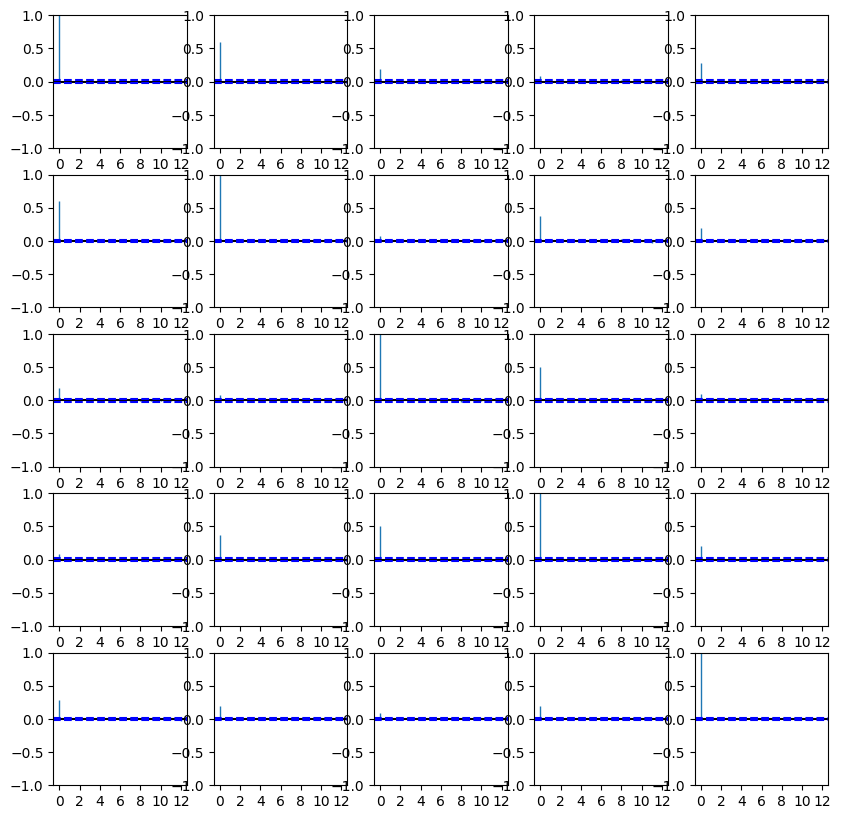

In [6]:
multi_ACFfig(x, nlags=12)
plt.show()

In [7]:
from PythonTsa.MultiCorrPvalue import MultiTrCorrPvalue

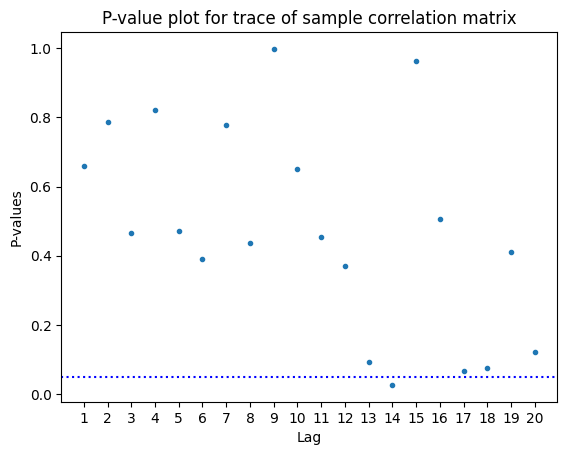

In [8]:
tr_st , pv = MultiTrCorrPvalue(x, lags = 20)

Temos uma auto correlação no lag 14, aparentemente é decorrente da estrutura de covariancia e metodo de estimação, dado que alterei a random_seed e mesmo assim continuia com essa autocorrelação no lag 14.

In [9]:
from PythonTsa.plot_multi_Q_pvalue import MultiQpvalue_plot

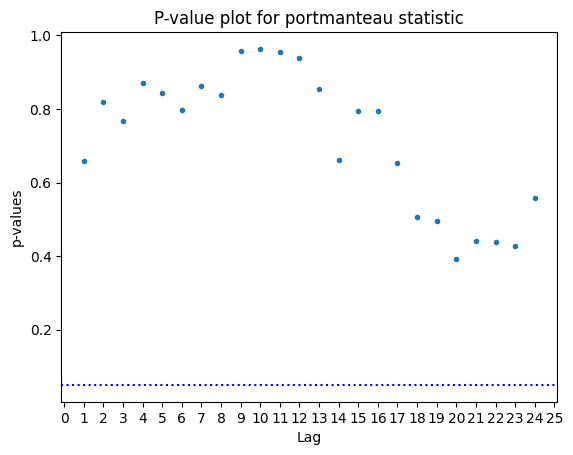

In [10]:
qs, pv = MultiQpvalue_plot(x, nolags = 24)

Np referene te ao teste de portmenteau (ou Ljung_Box multivariado) parece indicar que a serie decorrente é ruido branco, apesar do lag 14 ter autocorrelação.

# 7.3

In [11]:
coefs   = np.array([[[0.7,0.1,0.0],[0.0,0.4,0.1],[0.9,0.0,0.8]],
                   [[-0.2,0.0,0.0],[0.0,0.1,0.1],[0.0,0.0,0.0]]])
sigma_u = np.array([[0.26,0.03,0.0],[0.03,0.09,0.0],[0.0,0.0,0.81]])

coef_exo = np.array([0,0,0])

In [12]:
coefs

array([[[ 0.7,  0.1,  0. ],
        [ 0. ,  0.4,  0.1],
        [ 0.9,  0. ,  0.8]],

       [[-0.2,  0. ,  0. ],
        [ 0. ,  0.1,  0.1],
        [ 0. ,  0. ,  0. ]]])

In [13]:
from statsmodels.tsa.vector_ar.var_model import VARProcess

In [14]:
varProcess = VARProcess(coefs, coef_exo, sigma_u)
varsimul = varProcess.simulate_var(steps=300, seed= 1237)

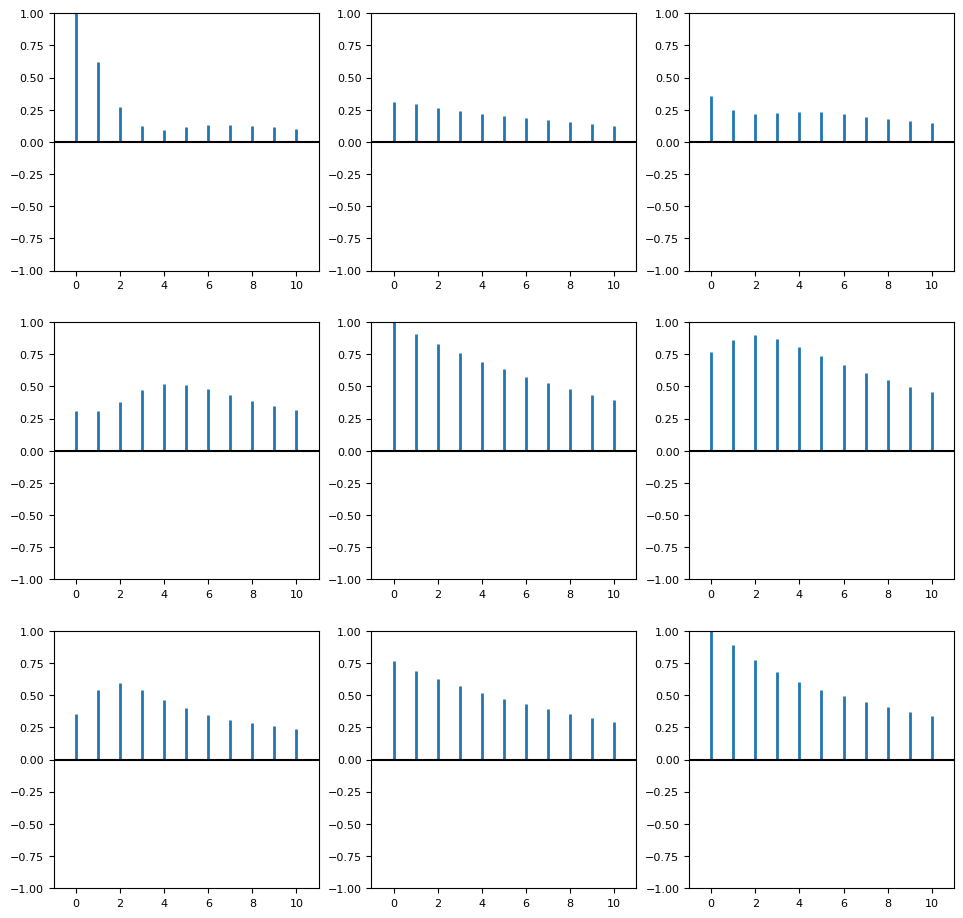

In [15]:
varProcess.plot_acorr(linewidth = 2, nlags = 10)
plt.show()

In [16]:
# (1) ver se é estavel
varProcess.is_stable()

True

para reescrever o processo $X_t$ como um VAR vamos fazer considerar $Y_{t} = [x_t, e_t]$ e o modelo fica $Y_t = Y_{t-p} + u_t$, ondee $u$ são os erros do modelo.

In [17]:
varProcess.ma_rep(maxn=3) #representação VMA()

array([[[1.   , 0.   , 0.   ],
        [0.   , 1.   , 0.   ],
        [0.   , 0.   , 1.   ]],

       [[0.7  , 0.1  , 0.   ],
        [0.   , 0.4  , 0.1  ],
        [0.9  , 0.   , 0.8  ]],

       [[0.29 , 0.11 , 0.01 ],
        [0.09 , 0.26 , 0.22 ],
        [1.35 , 0.09 , 0.64 ]],

       [[0.072, 0.083, 0.029],
        [0.261, 0.153, 0.242],
        [1.341, 0.171, 0.521]]])

In [18]:
varsimul = pd.DataFrame(varsimul)
varsimul = varsimul.dropna()

In [19]:
varsimul.set_axis(['zero','um','dois'], axis = 1, inplace = True)

C:\Users\guilh\AppData\Local\Temp\ipykernel_136428\3887089507.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  varsimul.set_axis(['zero','um','dois'], axis = 1, inplace = True)


In [20]:
varsimul

,zero,um,dois
0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000
2,-0.172147,-0.144565,0.427705
3,-0.033087,0.074513,0.615985
4,0.294906,0.084465,0.133204
...,...,...,...
295,-0.019077,0.312125,1.999527
296,0.020871,0.522532,2.546512
297,-0.038377,0.841625,1.949797
298,0.215383,0.820876,1.799603


In [21]:
from statsmodels.tsa.api import VAR


In [22]:
varmod = VAR(varsimul)
print(varmod.select_order(maxlags=4))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 2, BIC -> 2, FPE -> 2, HQIC ->  2>


In [23]:
varmod_res = varmod.fit(maxlags=2, ic=None, trend='c')
print(varmod_res.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 07, Aug, 2024
Time:                     09:16:52
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -3.87019
Nobs:                     298.000    HQIC:                  -4.02644
Log likelihood:          -632.053    FPE:                  0.0160716
AIC:                     -4.13073    Det(Omega_mle):       0.0149902
--------------------------------------------------------------------
Results for equation zero
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.025030         0.029649           -0.844           0.399
L1.zero         0.730261         0.059950           12.181           0.000
L1.um          -0.072865         0.098682           -0.738           0.460
L1.dois   

In [24]:
varmod_res.test_causality(caused ='zero ')

ValueError: 'zero ' is not in list

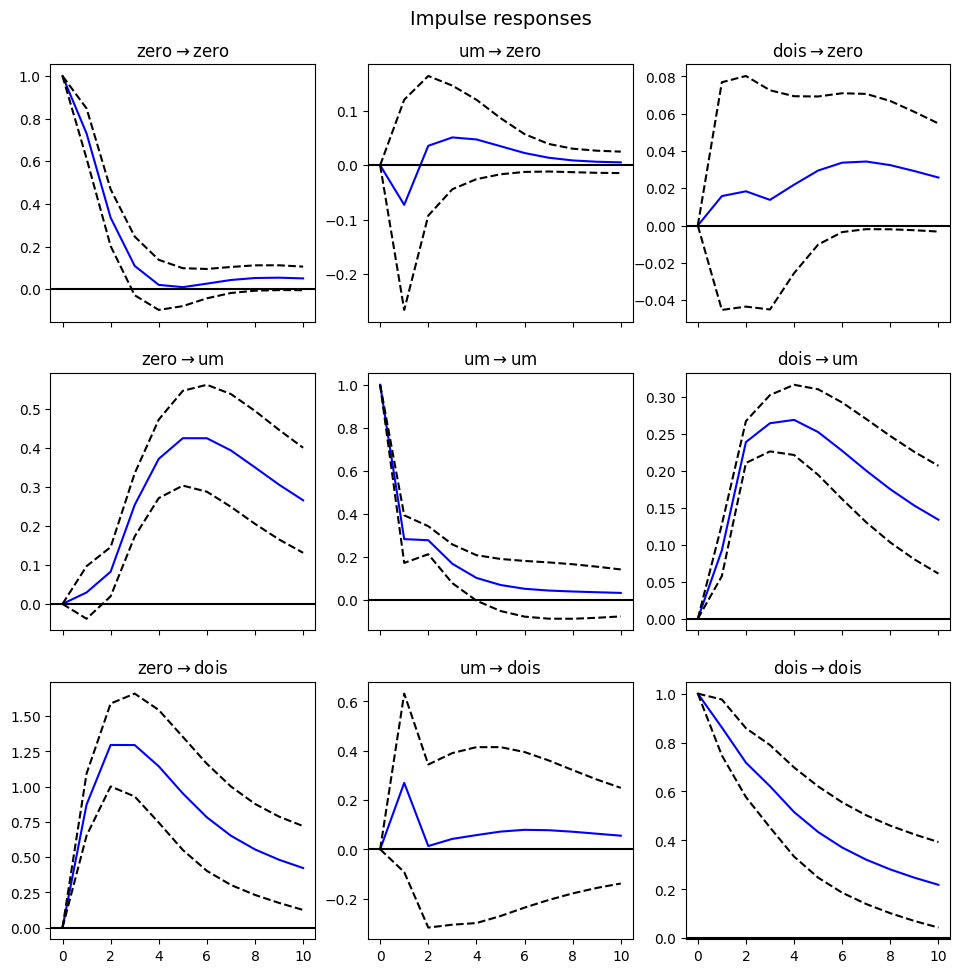

In [28]:
irf = varmod_res.irf(periods=10)
irf.plot()
plt.show()

# 7.8

In [29]:
from statsmodels.tsa.api import VARMAX

In [30]:
mdata = sm.datasets.macrodata.load_pandas().data

In [31]:
mdata = mdata[['realgdp', 'realcons', 'realinv']]

<Axes: >

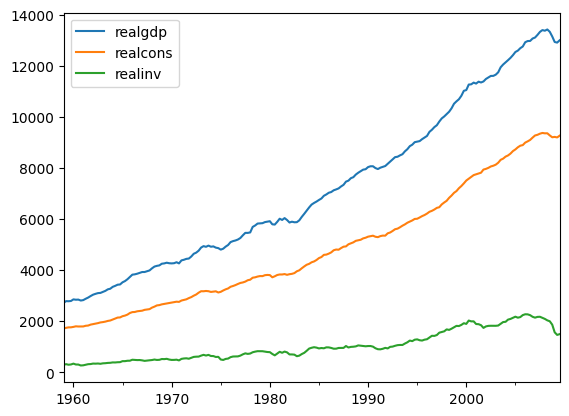

In [32]:
dates = pd.date_range('1959-01', periods=len(mdata), freq='Q')
mdata.index=dates
mdata.plot()

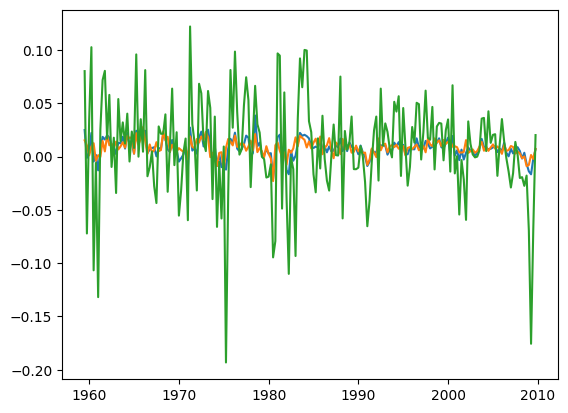

In [35]:
dldata = np.log(mdata).diff(1).dropna()
plt.plot(dldata)

In [41]:
mydata = dldata['1959-06-30': '2008-12-30']

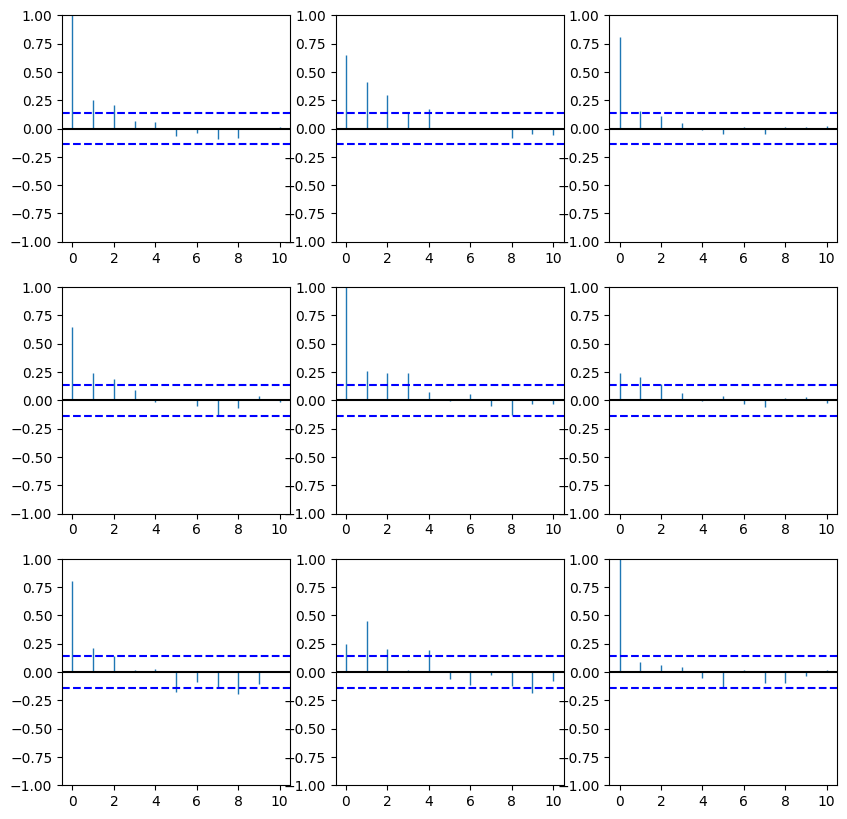

In [43]:
multi_ACFfig(mydata, nlags=10)
plt.show()

In [55]:
mymod = VAR(mydata)
print(mymod.select_order(maxlags=15))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 3, BIC -> 1, FPE -> 3, HQIC ->  1>


In [120]:
mymodel = VARMAX(mydata, order=(2,0), enforce_stationarity = True).fit()

In [121]:
print(mymodel.summary())

                                   Statespace Model Results                                   
Dep. Variable:     ['realgdp', 'realcons', 'realinv']   No. Observations:                  198
Model:                                         VAR(2)   Log Likelihood                1946.766
                                          + intercept   AIC                          -3839.533
Date:                                Wed, 07 Aug 2024   BIC                          -3750.750
Time:                                        10:27:52   HQIC                         -3803.596
Sample:                                    06-30-1959                                         
                                         - 09-30-2008                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):       0.09, 0.08, 0.00   Jarque-Bera (JB):    13.08, 2.11, 9.86
Prob(Q):                  0.76, 0.78, 0.95   Prob(JB):       

In [122]:
resid = mymodel.resid

[]

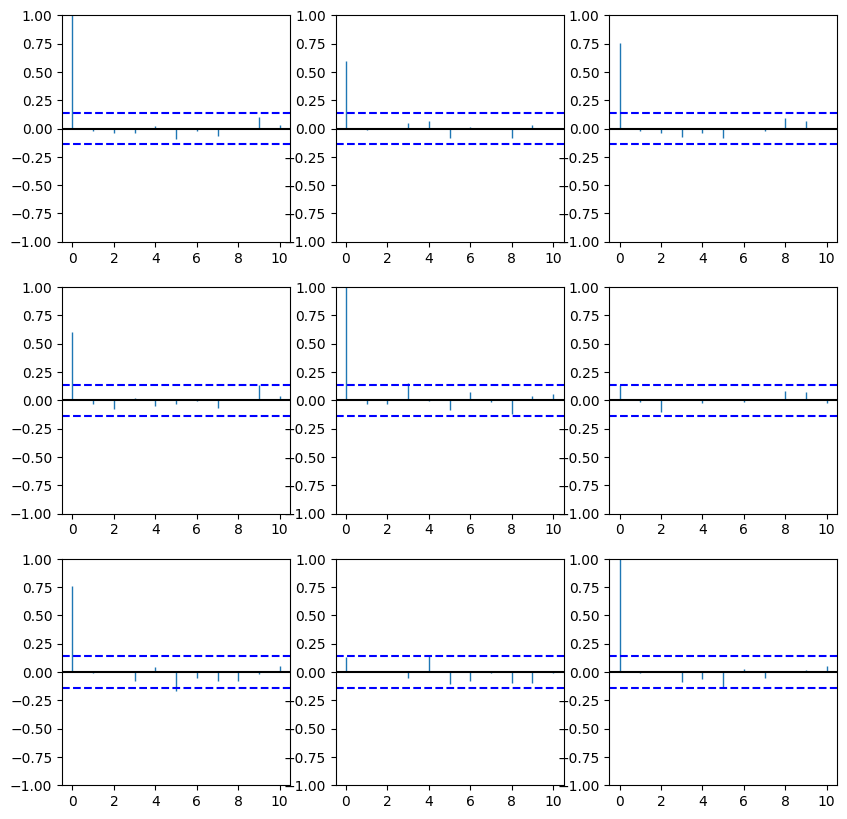

In [123]:
multi_ACFfig(resid, nlags=10)
plt.plot()

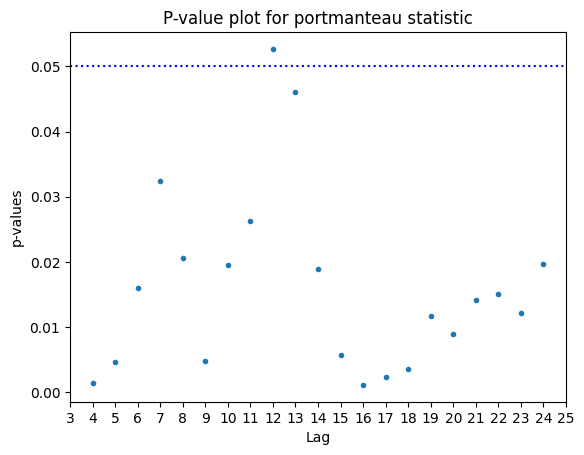

In [124]:
qs, pv =MultiQpvalue_plot(resid, p=1, q=0, noestimatedcoef=27, nolags=24)

VAR(1) E VAR(2) tem problemas de autocorrelação que não permitem usar o modelo

In [232]:
param = mymodel.param_names
mymodeldf=VARMAX(mdata, order = (3,0), enforce_stationarity=False)

In [139]:
with mymodeldf.fix_params({param[6]:0}):
    modff = mymodeldf.fit(method='bfgs')

         Current function value: 6452.309870
         Iterations: 0
         Function evaluations: 41
         Gradient evaluations: 35


C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [140]:
print(modff.summary())

                                   Statespace Model Results                                   
Dep. Variable:     ['realgdp', 'realcons', 'realinv']   No. Observations:                  203
Model:                                         VAR(3)   Log Likelihood            -1309818.904
                                          + intercept   AIC                        2619707.807
Date:                                Wed, 07 Aug 2024   BIC                        2619823.770
Time:                                        10:31:02   HQIC                       2619754.721
Sample:                                    03-31-1959                                         
                                         - 09-30-2009                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):          nan, nan, nan   Jarque-Bera (JB):   12.28, 15.11, 14.89
Prob(Q):                     nan, nan, nan   Prob(JB):      

In [141]:
resid1 = modff.resid

[]

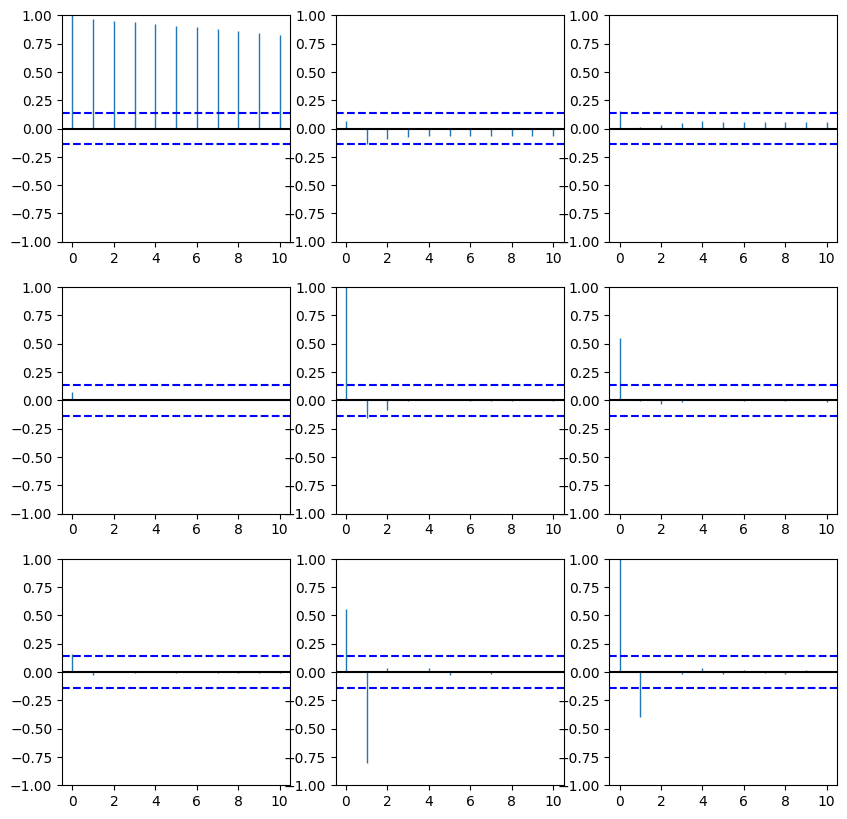

In [142]:
multi_ACFfig(resid1, nlags=10)
plt.plot()

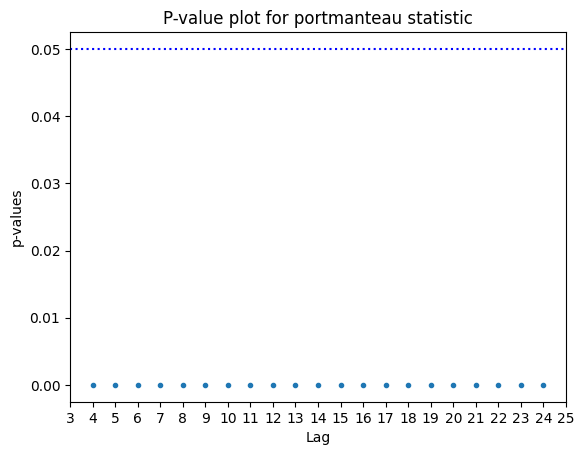

In [143]:
qs, pv =MultiQpvalue_plot(resid1, p=2, q=0, noestimatedcoef=27, nolags=24)

# 7.5

In [145]:
pib = pd.read_csv(dtapath + 'dlGDPukcaus1q1980.csv')

In [147]:
pib = pib[['uk', 'ca', 'us']]
pib

,uk,ca,us
0,-1.800543,-0.218069,-2.070885
1,-0.189718,-0.034974,-0.186787
2,-1.105247,1.116947,1.833655
3,-0.677008,2.467191,2.055720
4,0.205147,0.924107,-0.800773
...,...,...,...
120,1.062688,0.565790,0.929373
121,0.613618,0.608313,0.619131
122,-0.506327,0.759782,0.580521
123,0.465214,0.862698,0.089245


<Axes: >

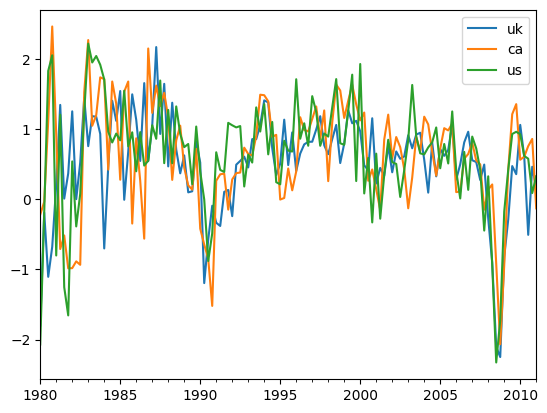

In [161]:
pib.plot()

In [156]:
data = pd.date_range('1980-01', '2011-4', freq='Q')
pib.index = data

In [157]:
pib

,uk,ca,us
1980-03-31,-1.800543,-0.218069,-2.070885
1980-06-30,-0.189718,-0.034974,-0.186787
1980-09-30,-1.105247,1.116947,1.833655
1980-12-31,-0.677008,2.467191,2.055720
1981-03-31,0.205147,0.924107,-0.800773
...,...,...,...
2010-03-31,1.062688,0.565790,0.929373
2010-06-30,0.613618,0.608313,0.619131
2010-09-30,-0.506327,0.759782,0.580521
2010-12-31,0.465214,0.862698,0.089245


[]

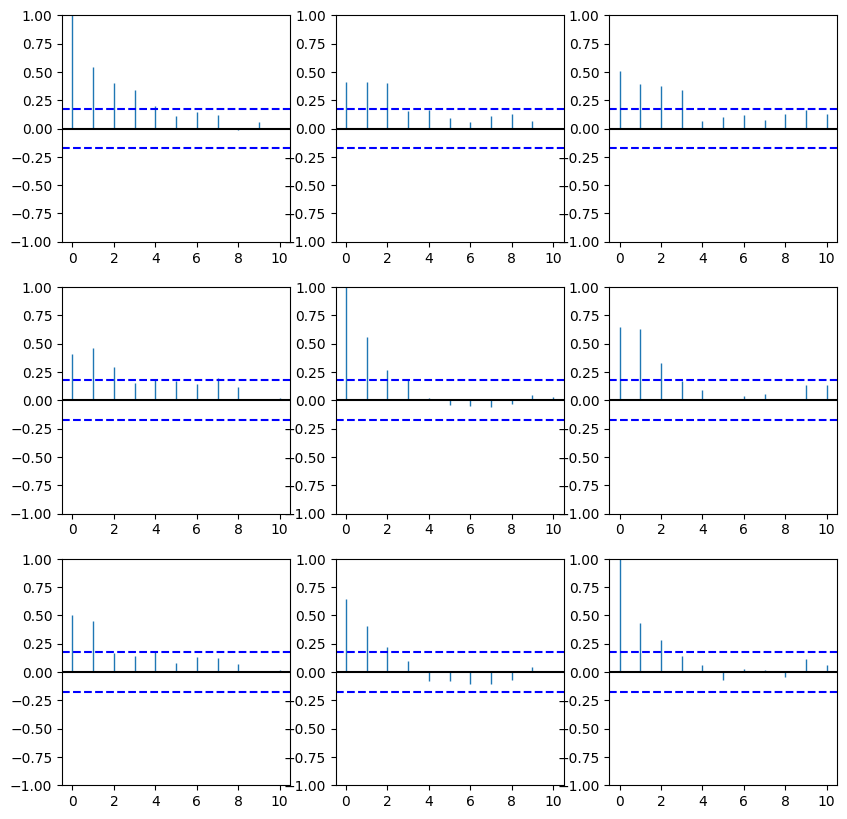

In [160]:
multi_ACFfig(pib, nlags=10)
plt.plot()

In [288]:
pib_model = VAR(pib)
print(pib_model.select_order(maxlags=5))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 1, FPE -> 4, HQIC ->  2>


In [289]:
pib_mod = VARMAX(mydata, order=(4,0),enforce_stationarity = True , trend = 'c').fit()
print(pib_mod.summary())

                                   Statespace Model Results                                   
Dep. Variable:     ['realgdp', 'realcons', 'realinv']   No. Observations:                  198
Model:                                         VAR(4)   Log Likelihood                1961.745
                                          + intercept   AIC                          -3833.490
Date:                                Wed, 07 Aug 2024   BIC                          -3685.518
Time:                                        11:18:16   HQIC                         -3773.596
Sample:                                    06-30-1959                                         
                                         - 09-30-2008                                         
Covariance Type:                                  opg                                         
Ljung-Box (L1) (Q):       0.08, 0.00, 0.08   Jarque-Bera (JB):    21.37, 1.76, 5.15
Prob(Q):                  0.78, 0.96, 0.78   Prob(JB):       

In [290]:
residuals = pib_mod.resid

[]

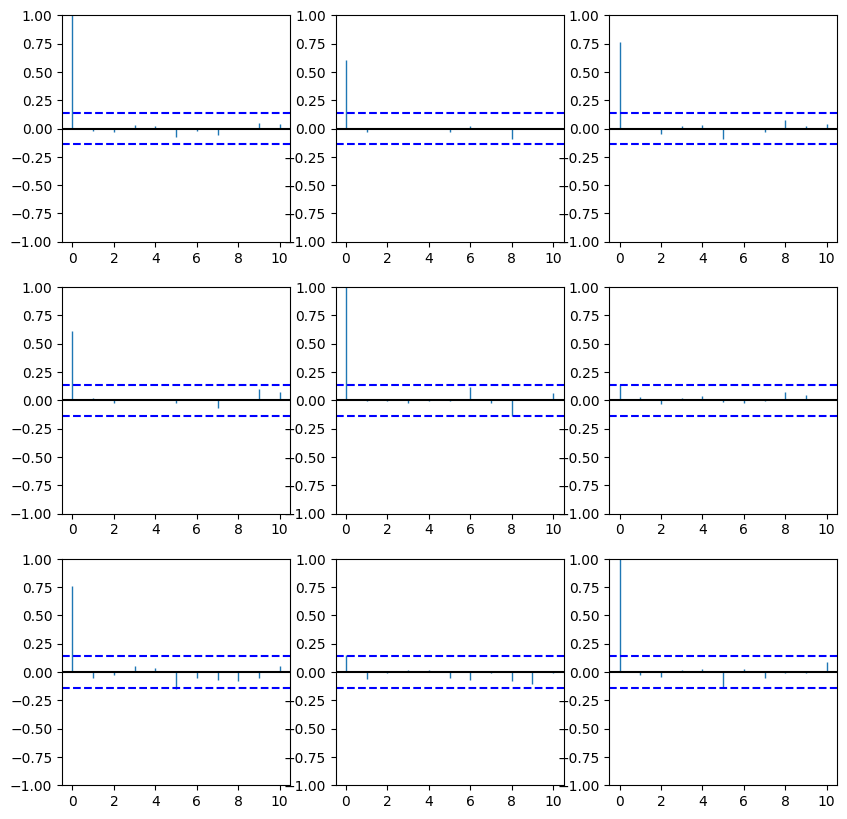

In [291]:
multi_ACFfig(residuals, nlags=10)
plt.plot()

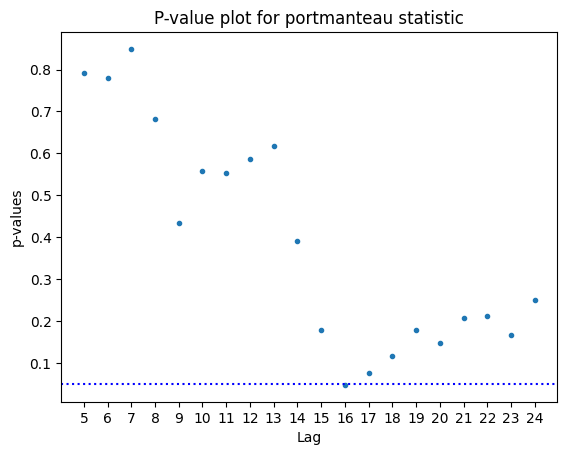

In [313]:
qs, pv =MultiQpvalue_plot(residuals, p=4, q=0, noestimatedcoef=27, nolags=24)

In [253]:
pib_mod.forecast(steps=8)

,realgdp,realcons,realinv
2008-12-31,-0.001952,0.001890,-0.041914
2009-03-31,-0.001172,0.001250,-0.023092
2009-06-30,0.003109,0.002793,-0.005051
2009-09-30,0.002049,0.005640,-0.020772
2009-12-31,0.005785,0.006401,0.004730
2010-03-31,0.005936,0.007110,0.002572
2010-06-30,0.006907,0.007785,0.004911
2010-09-30,0.007449,0.008292,0.008603


In [250]:
pib_mod.predict(end = '2009-09-03')

,realgdp,realcons,realinv
1959-06-30,0.007957,0.008507,0.009482
1959-09-30,0.011182,0.011279,0.022212
1959-12-31,0.011409,0.009549,0.022732
1960-03-31,0.004565,0.008144,-0.017482
1960-06-30,0.006777,0.007325,0.007944
...,...,...,...
2008-09-30,-0.000589,0.001601,-0.030117
2008-12-31,-0.001952,0.001890,-0.041914
2009-03-31,-0.001172,0.001250,-0.023092
2009-06-30,0.003109,0.002793,-0.005051


In [274]:
pib_mod.params

intercept.realgdp            0.001102
intercept.realcons           0.005322
intercept.realinv           -0.021550
L1.realgdp.realgdp          -0.319797
L1.realcons.realgdp          0.673745
L1.realinv.realgdp           0.034900
L2.realgdp.realgdp          -0.006516
L2.realcons.realgdp          0.282665
L2.realinv.realgdp          -0.004099
L3.realgdp.realgdp          -0.155159
L3.realcons.realgdp          0.140762
L3.realinv.realgdp           0.001124
L4.realgdp.realgdp           0.088999
L4.realcons.realgdp          0.071585
L4.realinv.realgdp          -0.028153
L1.realgdp.realcons         -0.138125
L1.realcons.realcons         0.248563
L1.realinv.realcons          0.024761
L2.realgdp.realcons         -0.061842
L2.realcons.realcons         0.195024
L2.realinv.realcons          0.002538
L3.realgdp.realcons         -0.366786
L3.realcons.realcons         0.431622
L3.realinv.realcons          0.042073
L4.realgdp.realcons         -0.141671
L4.realcons.realcons         0.076839
L4.realinv.r

In [262]:
pib_moddf=VARMAX(pib, order = (4,0), enforce_stationarity=False)
param = pib_moddf.param_names

In [314]:
with pib_moddf.fix_params({param[4]:0, param[6]:0,param[8]:0,param[9]:0, param[12]:0,
                          param[20]:0, param[21]:0, param[22]:0,param[23]:0,param[24]:0,
                          param[33]:0, param[34]:0,param[35]:0,param[38]:0}):
    modff = pib_moddf.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: 2.306216
         Iterations: 22
         Function evaluations: 32
         Gradient evaluations: 32


In [315]:
print(modff.summary())

                           Statespace Model Results                           
Dep. Variable:     ['uk', 'ca', 'us']   No. Observations:                  125
Model:                         VAR(4)   Log Likelihood                -288.277
                          + intercept   AIC                            638.554
Date:                Wed, 07 Aug 2024   BIC                            726.232
Time:                        11:23:17   HQIC                           674.173
Sample:                    03-31-1980                                         
                         - 03-31-2011                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):       0.22, 0.09, 0.06   Jarque-Bera (JB):     67.50, 1.98, 4.68
Prob(Q):                  0.64, 0.77, 0.80   Prob(JB):              0.00, 0.37, 0.10
Heteroskedasticity (H):   0.57, 0.26, 0.39   Skew:               -1.28, -0.18, -0.38
Prob(H) (two-sided):      0.07, 0.

In [316]:
resid_modff = modff.resid

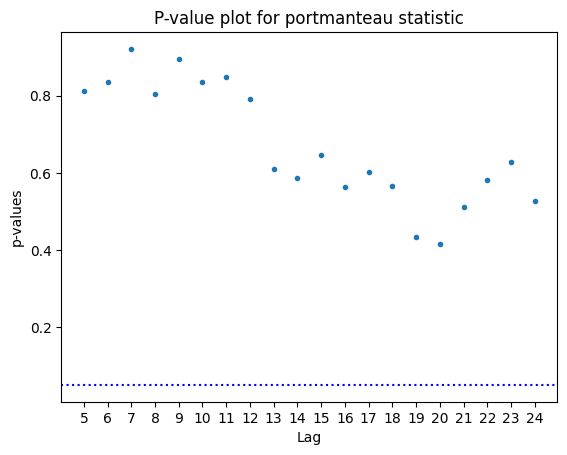

In [318]:
qs, pv =MultiQpvalue_plot(resid_modff, p=4, q=0, noestimatedcoef=22, nolags=24)

# 7.6

[]

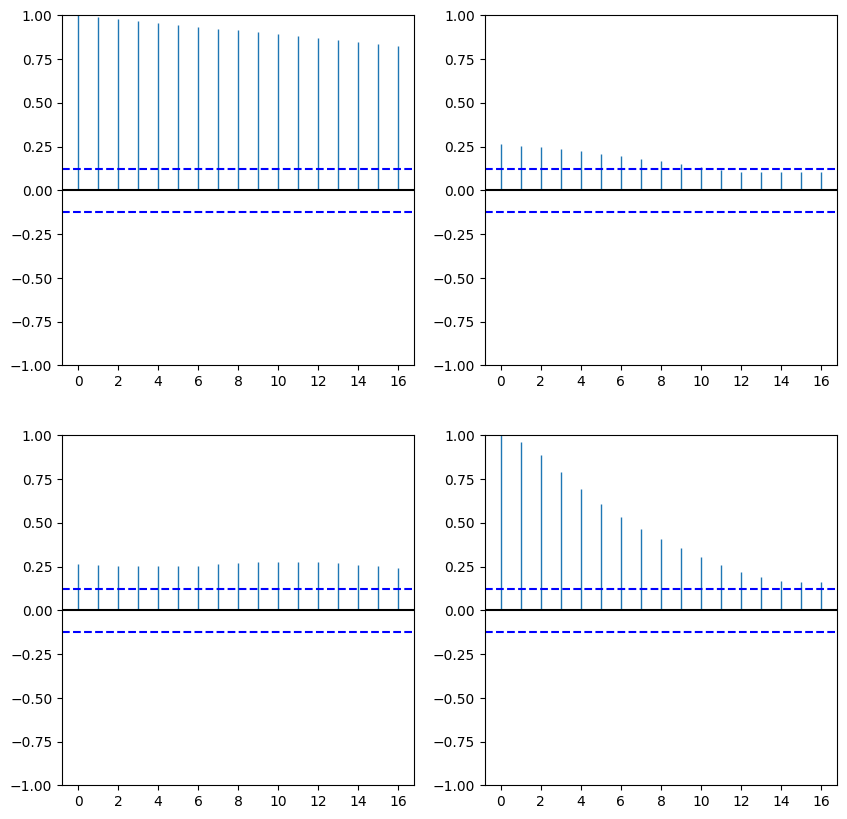

In [320]:
#com base no exemplo 7.3
mda = pd.read_csv(dtapath + 'USQgdpunemp.csv', header = 0)
mda = mda[['gdp', 'rate']]
dates = pd.date_range('1948-01', periods = len(mda), freq='Q')
mda.index = dates
multi_ACFfig(mda,nlags=16)
plt.plot()

<Axes: >

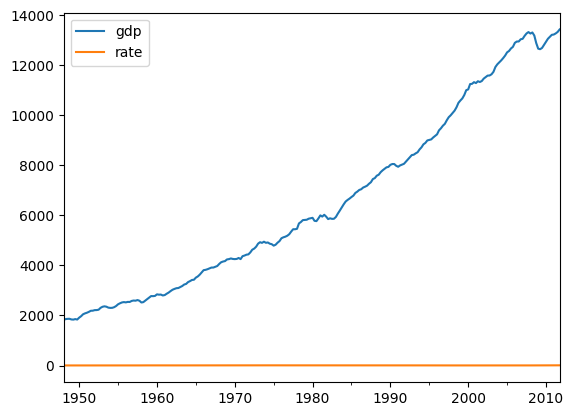

In [321]:
mda.plot()

In [323]:
mda['gdp'] = np.log(mda['gdp'])
mda.columns = ['lgdp', 'rate']

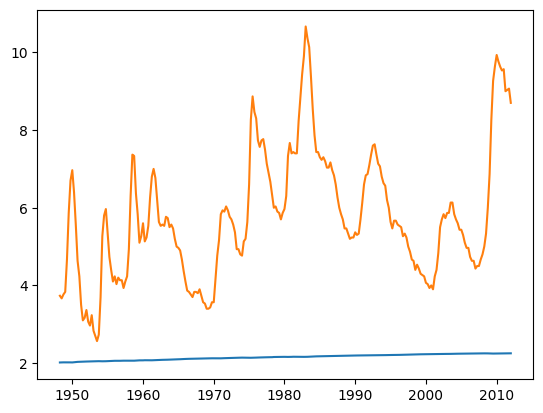

In [324]:
plt.plot(mda)

In [327]:
dmda = mda.diff(1).dropna()

<Axes: >

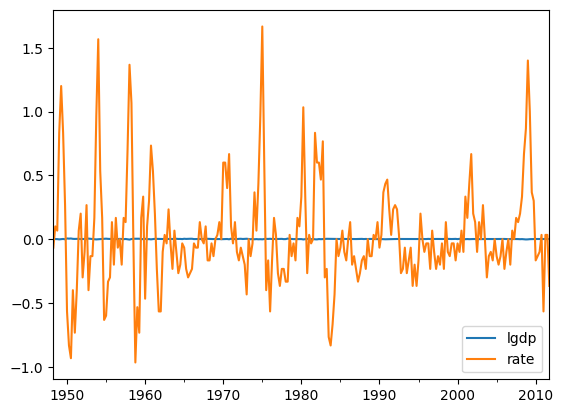

In [328]:
dmda.plot()

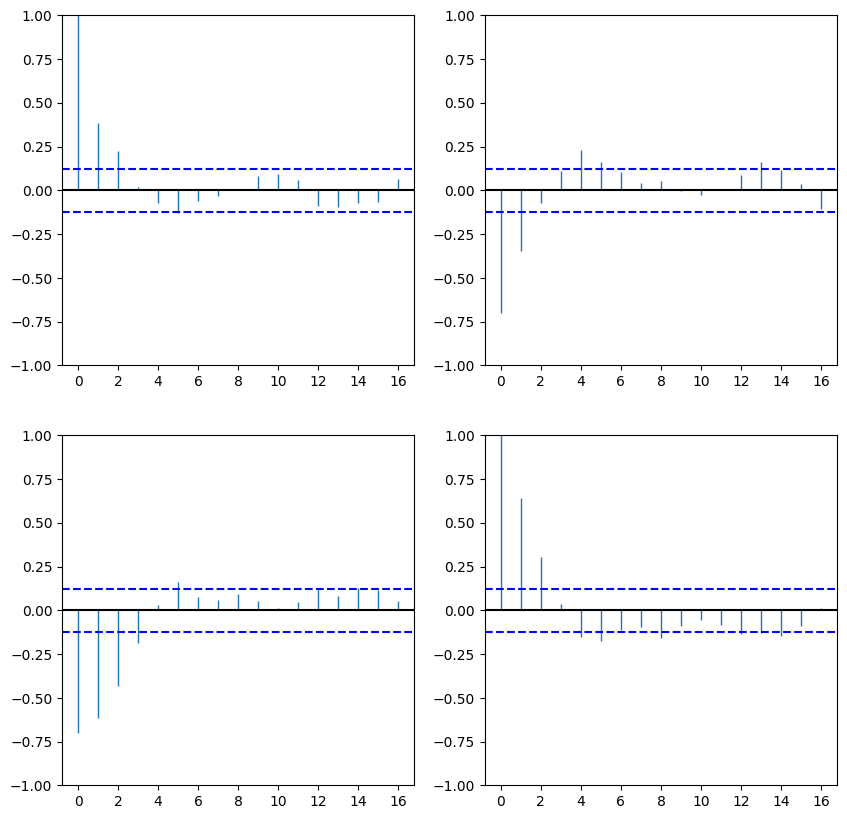

In [330]:
multi_ACFfig(dmda,nlags=16)
plt.show()

In [343]:
mymod1 = VAR(dmda)
print(mymod1.select_order(maxlags=12))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 12, BIC -> 1, FPE -> 12, HQIC ->  1>


In [344]:
var_model = VARMAX(dmda, order=(12,0)).fit()

In [345]:
var_model.summary()

Dep. Variable:,"['lgdp', 'rate']",No. Observations:,255
Model:,VAR(12),Log Likelihood,1450.515
,+ intercept,AIC,-2795.030
Date:,"Wed, 07 Aug 2024",BIC,-2607.343
Time:,12:52:35,HQIC,-2719.534
Sample:,06-30-1948,,
,- 12-31-2011,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.23, 0.44",Jarque-Bera (JB):,"19.20, 0.83"
Prob(Q):,"0.63, 0.51",Prob(JB):,"0.00, 0.66"
Heteroskedasticity (H):,"0.27, 0.67",Skew:,"0.13, -0.01"


In [346]:
res = var_model.resid

[]

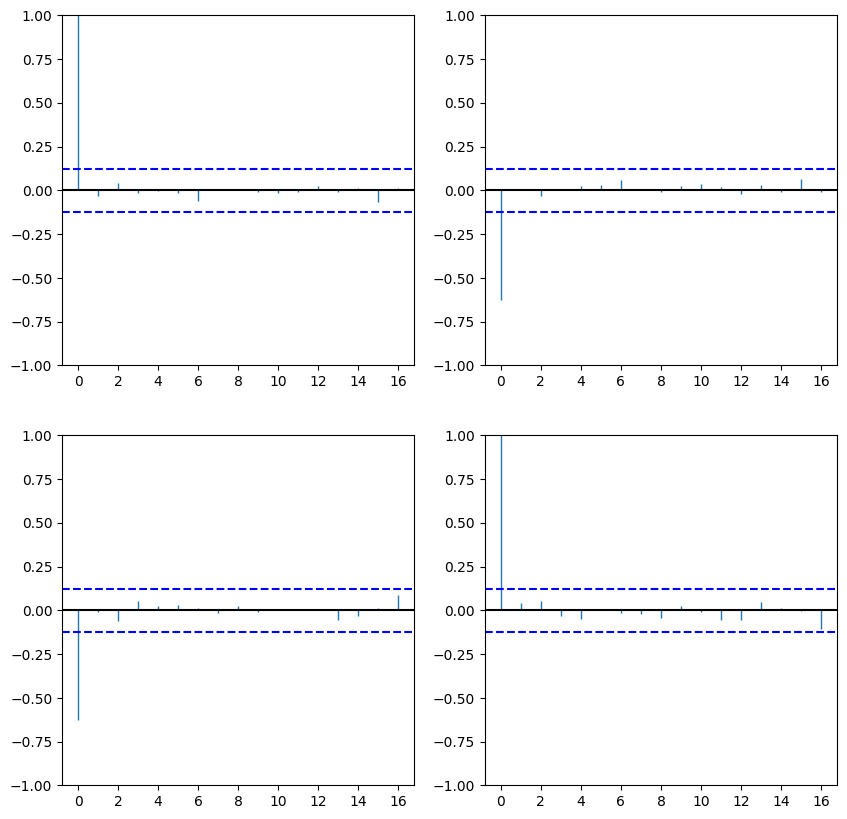

In [347]:
multi_ACFfig(res,nlags=16)
plt.plot()

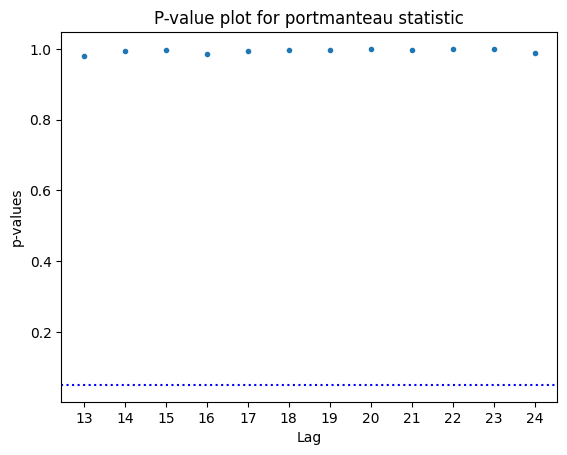

In [348]:
qs, pv =MultiQpvalue_plot(res, p=12, q=0, noestimatedcoef=22, nolags=24)

In [356]:
vardf=VARMAX(dmda, order = (12,0), enforce_stationarity=False)
param = vardf.param_names
with vardf.fix_params({param[9]:0,param[10]:0, param[13]:0,param[14]:0,param[18]:0,param[19]:0,
                       param[22]:0,param[23]:0, param[44]:0,param[41]:0, param[45]:0
                      }):
    vmodff = vardf.fit(method='bfgs')

C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\scipy\optimize\_optimize.py:1292: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
C:\Users\guilh\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: -5.221159
         Iterations: 0
         Function evaluations: 21
         Gradient evaluations: 21


In [357]:
 vmodff.summary()

Dep. Variable:,"['lgdp', 'rate']",No. Observations:,255
Model:,VAR(12),Log Likelihood,1331.396
,+ intercept,AIC,-2578.791
Date:,"Wed, 07 Aug 2024",BIC,-2430.058
Time:,13:11:59,HQIC,-2518.964
Sample:,06-30-1948,,
,- 12-31-2011,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"3.51, 16.12",Jarque-Bera (JB):,"34.48, 38.48"
Prob(Q):,"0.06, 0.00",Prob(JB):,"0.00, 0.00"
Heteroskedasticity (H):,"0.20, 0.49",Skew:,"0.33, -0.21"


In [361]:
resd = vmodff.resid

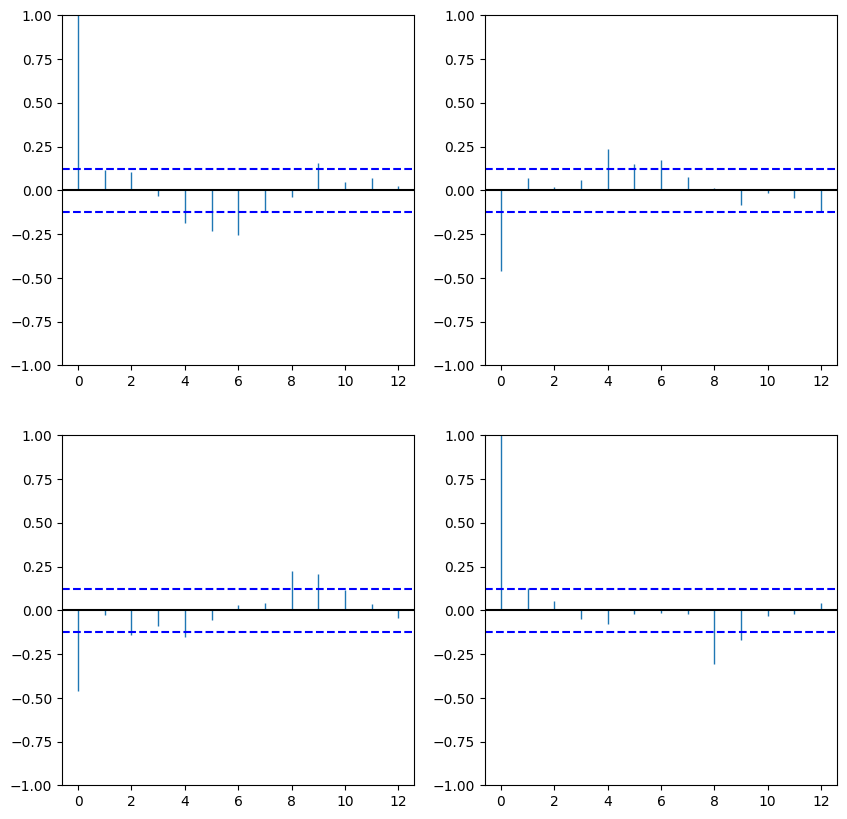

In [363]:
multi_ACFfig(resd, nlags=12)
plt.show()

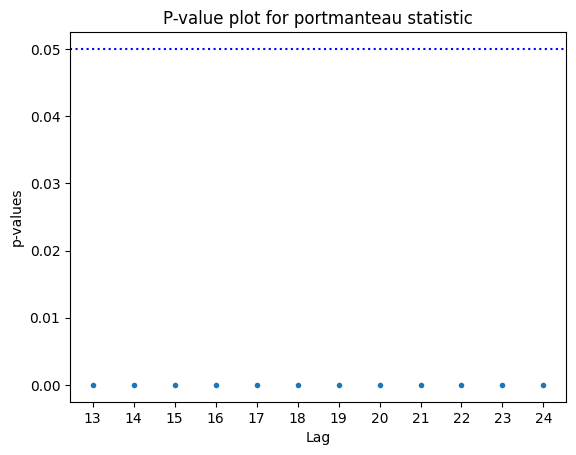

In [364]:
qs, pv =MultiQpvalue_plot(resd, p=12, q=0, noestimatedcoef=22, nolags=24)